<a name="lib"></a>

# Import libraries and packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


# Import Dataset

In [ ]:
maindf = pd.read_csv('/content/drive/MyDrive/SKRIPSI/UNTR.JK.csv')
maindf = maindf.rename(columns={'Date': 'date','Open':'open','High':'high','Low':'low','Close':'close',
                                'Adj Close':'adj_close','Volume':'volume'})
maindf.head()

,date,open,high,low,close,adj_close,volume
0,2019-01-01,27350.0,27350.0,27350.0,27350.0,22522.718750,0
1,2019-01-02,27350.0,27650.0,27150.0,27325.0,22502.130859,2171300
2,2019-01-03,27400.0,27650.0,27300.0,27575.0,22708.003906,3808500
3,2019-01-04,27350.0,29000.0,27225.0,29000.0,23881.494141,10285000
4,2019-01-07,29250.0,29525.0,27850.0,27975.0,23037.404297,8798500


In [ ]:
print("Total number of days: ",maindf.shape[0])
print("Total number of fields: ",maindf.shape[1])

Total number of days:  1020
Total number of fields:  7


<a name="na"></a>

# Checking Null and NA value

In [ ]:
print("Null values:", maindf.isnull().values.sum())
print("NA values:", maindf.isna().values.any())

Null values: 0
NA values: False


<a name="predate"></a>

# Convert Date field into datetime format

In [ ]:
# convert date field from string to Date format 
maindf['date'] = pd.to_datetime(maindf.date)
maindf.head()

,date,open,high,low,close,adj_close,volume
0,2019-01-01,27350.0,27350.0,27350.0,27350.0,22522.718750,0
1,2019-01-02,27350.0,27650.0,27150.0,27325.0,22502.130859,2171300
2,2019-01-03,27400.0,27650.0,27300.0,27575.0,22708.003906,3808500
3,2019-01-04,27350.0,29000.0,27225.0,29000.0,23881.494141,10285000
4,2019-01-07,29250.0,29525.0,27850.0,27975.0,23037.404297,8798500


<a name="eda"></a>

# EDA - Exploratory Data Analysis

<a name="dur"></a>

### Find the duration of dataset

In [ ]:
print("Starting date: ",maindf.iloc[0][0])
print("Ending date: ", maindf.iloc[-1][0])
print("Duration: ", maindf.iloc[-1][0]-maindf.iloc[0][0])

Starting date:  2019-01-01 00:00:00
Ending date:  2023-02-09 00:00:00
Duration:  1500 days 00:00:00


<a name="oc"></a>

### Monthwise comparision between Stock open and close price

In [ ]:
monthvise= maindf.groupby(maindf['date'].dt.strftime('%B'))[['open','close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,open,close
date,,
January,24418.457944,24310.514019
February,22911.607143,22876.190476
March,22597.383721,22559.593023
April,23371.686747,23353.313253
May,23275.000000,23246.126761
June,24065.548780,24027.134146
July,23767.528736,23743.678161
August,24393.292683,24356.097561
September,25175.574713,25236.494253


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

<a name="hl"></a>

### Monthwise High and Low stock price 

In [ ]:
maindf.groupby(maindf['date'].dt.strftime('%B'))['low'].min()
monthvise_high = maindf.groupby(maindf['date'].dt.strftime('%B'))['high'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = maindf.groupby(maindf['date'].dt.strftime('%B'))['low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

<a name="trend"></a>

### Trend comparision between stock open price, close price, high price, low price

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(maindf, x=maindf.date, y=[maindf['open'], maindf['close'], 
                                          maindf['high'], maindf['low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

<a name="sc"></a>

**Here, We are going to predict close price for next 30 days**

# Prepare Stock Close price

<a name="df"></a>

### Make separate dataframe of close price

In [ ]:
closedf = maindf[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1020, 2)


<a name="pclose"></a>

### Plotting Stock Close price chart

In [ ]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="year"></a>

# Consider only last 1 year data for prediction

In [ ]:
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  1020


In [ ]:
close_stock.describe()

,close
count,1020.000000
mean,23970.490196
std,4379.541860
min,12600.000000
25%,21268.750000
50%,23250.000000
75%,26756.250000
max,35500.000000


In [ ]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Stock close price', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="norm"></a>

### Normalizing close price

In [ ]:
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(1020, 1)


In [ ]:
df1 = pd.DataFrame(columns=['Date', 'Scaling'])
closedf1=scaler.fit_transform(np.array(closedf).reshape(-1,1))
df1['Scaling'] = pd.DataFrame(closedf1)
df1['Date'] = close_stock['date']
df1

,Date,Scaling
0,2019-01-01,0.644105
1,2019-01-02,0.643013
2,2019-01-03,0.653930
3,2019-01-04,0.716157
4,2019-01-07,0.671397
...,...,...
1015,2023-02-03,0.497817
1016,2023-02-06,0.494541
1017,2023-02-07,0.537118
1018,2023-02-08,0.532751


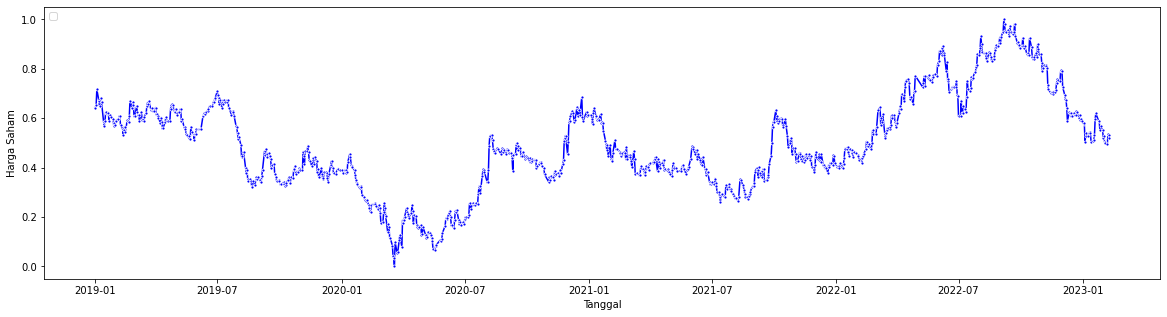

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(20, 5))
ax = sns.lineplot(x="Date", y="Scaling", data=df1, 
                     marker='.', color = 'blue')
plt.xlabel('Tanggal'); plt.ylabel('Harga Saham')
plt.legend(loc='upper left')

<a name="split"></a>

### Prepare Data for train and test

In [ ]:
training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (816, 1)
test_data:  (204, 1)


<a name="trans"></a>

### Transform Close price base on Time-series-analysis forecasting requirement

Look at the below image to get bit of understanding about create dataset for forecasting time-series-analysis


![Capture.PNG](attachment:8bd2bfa8-efd4-41c5-9ebc-45159ae91515.PNG)


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (800, 15)
y_train:  (800,)
X_test:  (188, 15)
y_test (188,)


In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (800, 15, 1)
X_test:  (188, 15, 1)


<a name="gru"></a>

# Model Building (GRU)

**GRUs (Gated Recurrent Units) are very similar to Long Short Term Memory(LSTM). Just like LSTM, GRU uses gates to control the flow of information. They are relatively new as compared to LSTM. This is the reason they offer some improvement over LSTM and have simpler architecture.**

Image reference: [Here](http://dprogrammer.org/rnn-lstm-gru)

![unnamed.png](attachment:a72d6346-c5f0-4f8c-b5fe-8657e85a700c.png)

Follow below reference links tto know more about GRU and LSTM:

- [Comprehensive guide about GRU](https://www.analyticsvidhya.com/blog/2021/03/introduction-to-gated-recurrent-unit-gru/)

- [Comprehensive guide about LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(64,return_sequences=True,input_shape=(time_step,1)))
model.add(Dropout(0.5))
model.add(GRU(units = 64))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 64)            12864     
                                                                 
 dropout (Dropout)           (None, 15, 64)            0         
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
25/25 [==============================] - 5s 57ms/step - loss: 0.0355 - mse: 0.0355 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 2/200
25/25 [==============================] - 1s 23ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 3/200
25/25 [==============================] - 1s 22ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 4/200
25/25 [==============================] - 1s 22ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 5/200
25/25 [==============================] - 1s 22ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 6/200
25/25 [==============================] - 1s 22ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 7/200
25/25 [==============================] - 1s 22ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 8/200
25/25 [==============================] - 1s 22ms/step - loss: 0.

In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(64,return_sequences=True,input_shape=(time_step,1)))
model.add(Dropout(0.2))
model.add(GRU(units = 64))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
25/25 [==============================] - 17s 164ms/step - loss: 0.0265 - mse: 0.0265 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 2/200
25/25 [==============================] - 1s 50ms/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 3/200
25/25 [==============================] - 1s 58ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4/200
25/25 [==============================] - 1s 43ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 5/200
25/25 [==============================] - 1s 38ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 6/200
25/25 [==============================] - 1s 39ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 7/200
25/25 [==============================] - 0s 20ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 8/200
25/25 [==============================] - 1s 21ms/step - loss: 

<a name="loss"></a>

### Plotting loss chart

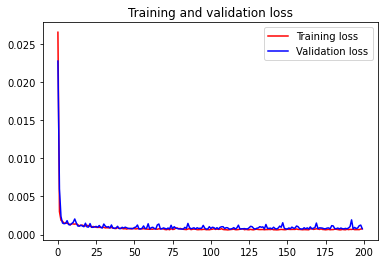

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

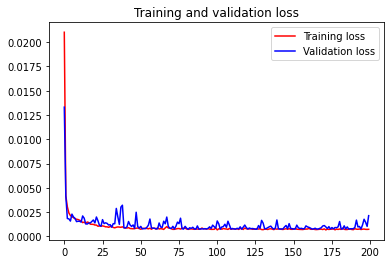

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 1s 6ms/step


((800, 1), (188, 1))

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

6/6 [==============================] - 1s 7ms/step


((800, 1), (188, 1))

<a name="eval"></a>

# Model Evaluation

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<a name="mse"></a>

### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
from sklearn.metrics import mean_absolute_percentage_error
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("Train data MAPE: ", round(mean_absolute_percentage_error(train_predict,original_ytrain),4)*100)
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("Test data MAPE: ", round(mean_absolute_percentage_error(original_ytest,test_predict),4)*100)

Train data RMSE:  559.190735929996
Train data MSE:  312694.27914993046
Train data MAE:  424.60831787109373
Train data MAPE:  1.95
-------------------------------------------------------------------------------------
Test data RMSE:  635.9462602973715
Test data MSE:  404427.64598621224
Test data MAE:  455.5106279089097
Test data MAPE:  1.53


In [ ]:
# Evaluation metrices RMSE and MAE
from sklearn.metrics import mean_absolute_percentage_error
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("Train data MAPE: ", round(mean_absolute_percentage_error(train_predict,original_ytrain),4)*100)
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("Test data MAPE: ", round(mean_absolute_percentage_error(original_ytest,test_predict),4)*100)

Train data RMSE:  568.1537941153692
Train data MSE:  322798.7337676894
Train data MAE:  422.5365783691406
Train data MAPE:  1.9300000000000002
-------------------------------------------------------------------------------------
Test data RMSE:  737.7285476377787
Test data MSE:  544243.4099997462
Test data MAE:  575.5414415724736
Test data MAPE:  1.91


<a name="var"></a>

### Explained variance regression score


The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9712462473110111
Test data explained variance regression score: 0.9576920865401714


In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9708301313850977
Test data explained variance regression score: 0.9573840118570935


<a name="r2"></a>

### R<sup>2</sup> score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best <br>
0 or < 0 = worse

In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.970470213070887
Test data R2 score: 0.956486320224349


In [ ]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9695159826554522
Test data R2 score: 0.9414430895173159


<a name="mpd"></a>

### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [ ]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0006960965388822348
Test data MGD:  0.0004634605869108433
----------------------------------------------------------------------
Train data MPD:  14.497883014894537
Test data MPD:  13.62558915252277


<a name="cp"></a>

# Comparision of original stock close price and predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1020, 1)
Test predicted data:  (1020, 1)


In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1020, 1)
Test predicted data:  (1020, 1)


<a name="days"></a>

# Predicting next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


<a name="pdays"></a>

### Plotting last 15 days of dataset and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
hasil = pd.DataFrame(columns=['date',  'close'])
hasil['date']=pd.date_range(start='2023-02-10', end='2023-03-11')
hasil['close'] = pd.DataFrame(next_predicted_days_value[16:])
hasil

,date,close
0,2023-02-10,24512.667680
1,2023-02-11,24535.466379
2,2023-02-12,24542.936730
3,2023-02-13,24547.047949
4,2023-02-14,24551.625979
5,2023-02-15,24556.386912
6,2023-02-16,24561.460418
7,2023-02-17,24566.675878
8,2023-02-18,24571.670216
9,2023-02-19,24576.667285


In [ ]:
hasil1 = pd.DataFrame(columns=['date',  'close'])
hasil1['date']=pd.date_range(start='2023-02-10', end='2023-03-11')
hasil1['close'] = pd.DataFrame(next_predicted_days_value[16:])
hasil1.to_csv('hasil1.csv')
hasil1

,date,close
0,2023-02-10,24534.136921
1,2023-02-11,24570.514107
2,2023-02-12,24597.518206
3,2023-02-13,24623.210591
4,2023-02-14,24648.130417
5,2023-02-15,24672.547942
6,2023-02-16,24696.856272
7,2023-02-17,24720.868409
8,2023-02-18,24744.236290
9,2023-02-19,24767.144185


<a name="pwhole"></a>

### Plotting entire Closing Stock Price with next 30 days period of prediction 

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()